<a href="https://colab.research.google.com/github/MarcosRoms/Deep_learning_colab/blob/colab/1_Introduccion_opencv_DIPLOMADO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Operaciones basicas de opencv


<center>

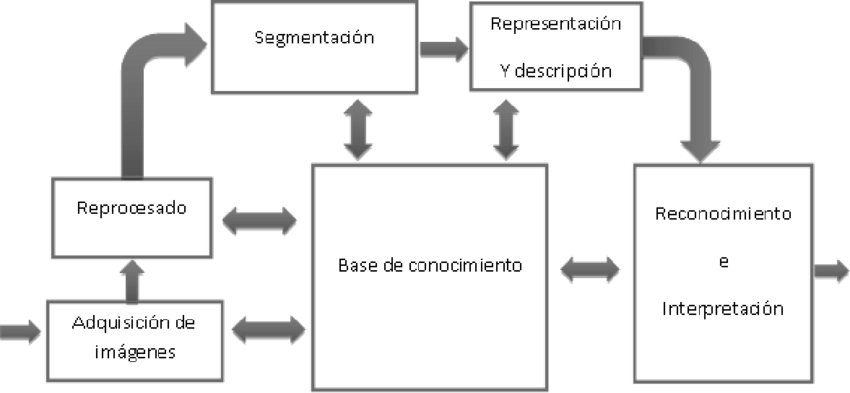


</center>

## Lectura de una imagen con opencv

In [ ]:
# Importamos la biblioteca OpenCV.
import cv2
import matplotlib.pyplot as plt
import numpy as np
# Leer la imagen desde un archivo. Reemplaza 'ruta_de_tu_imagen.jpg' con la ruta de tu imagen.
imagen = cv2.imread()

# Verificar si la imagen se cargó correctamente.
if imagen is None:
    print("Error: No se pudo cargar la imagen.")
    exit()

In [ ]:
def mostrar_imagen(imagen, titulo="Imagen"):
    """
    Muestra una imagen usando Matplotlib.

    :param imagen: Imagen a mostrar (puede ser RGB o escala de grises).
    :param titulo: Título para la visualización.
    """
    plt.figure(figsize=(10, 6))

    # Si la imagen tiene 3 canales, asumimos que es RGB.
    # En caso contrario, asumimos que es escala de grises.
    if len(imagen.shape) == :
        imagen = cv2.cvtColor(    )
        plt.imshow(imagen)
    else:
        plt.imshow(imagen, cmap='gray')

    plt.title(titulo)
    plt.axis('off')
    plt.show()

In [ ]:
mostrar_imagen(,'Imagen 1')

## Convertir imagen a escala de grises

Una imagen en escala de grises es un arreglo matricial de dos dimensiones que aporta información de la intensidad de luz presente para cada punto en la imagen.

Ponderación para convertir una imagen a escala de grises
$$
\text { gris }=0.299 \times R+0.587 \times G+0.114 \times B
$$

In [ ]:
# Convertir la imagen a escala de grises.
imagen_gris = cv2.cvtColor(imagen,)
mostrar_imagen(, "Imagen en escala de grises")

La reducción de los niveles de cuantización convierte una imagene con una escala de grises de X niveles de intesidad a otra con una escala menor, reduciendo el volumen de datos

In [ ]:
def gray2ind(img, k):
    """
    Cuantiza una imagen en escala de grises a 'k' niveles distintos.

    Parámetros:
    - img (numpy.ndarray): Imagen en escala de grises de entrada.
    - k (int): Número de niveles de grises deseados después de la cuantización.

    Retorna:
    - numpy.ndarray: Imagen cuantizada.
    """

    # Calcula el intervalo de niveles de grises.
    # Por ejemplo, para una imagen de 8 bits (256 niveles) y k=4, el nivel será 64.
    nivel = 256 // k

    # Cuantiza la imagen:
    # - Primero, divide cada píxel de la imagen por 'nivel'.
    # - Luego, multiplica el resultado por 'nivel' para obtener el valor cuantizado.
    # - Finalmente, convierte los valores a tipo uint8 (imagen de 8 bits).
    im1 = (img // nivel * nivel).astype(np.uint8)

    return im1

In [ ]:
mostrar_imagen(,"3 Niveles de gris")

## Suma y resta de imagenes

La suma con OpenCV, `cv2.add()`, es una operación saturada, lo que significa que los valores están limitados al rango válido para el tipo de datos de la imagen (usualmente 0-255 para imágenes en 8-bit). Si la suma de los píxeles de las imágenes supera este rango, el resultado simplemente se trunca al valor máximo (255 para uint8).

Por otro lado, la suma con Numpy es una operación modular, realizada en cada bit y no considera el desbordamiento, también conocido como "wrap around". Si la suma de los píxeles de las imágenes supera el rango, el valor resultante se calculará como el módulo de la suma con 256 (para imágenes de 8-bit), esencialmente "volviendo a la cuenta" una vez que hemos alcanzado el valor máximo.


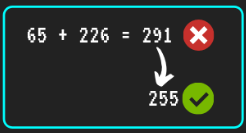

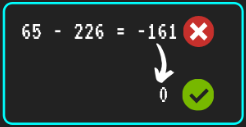


In [ ]:
imagen_1 = cv2.imread("Manzana.png"     )
imagen_2 = cv2.imread("Manzana.png"     )

# Asegurarse de que ambas imágenes tengan las mismas dimensiones
if imagen_1.shape != imagen_2.shape:
    print("Las imágenes deben tener las mismas dimensiones")
    exit()

SumA = cv2.add(          )
mostrar_imagen(SumA,"Suma cv2.add()")


SumA =
mostrar_imagen(SumA,"Suma numpy")

In [ ]:
RestA = cv2.subtract( ,   )


mostrar_imagen(RestA,"Resta cv2")
RestA =
mostrar_imagen(RestA,"Resta numpy")

## Cambiar el tamaño de imagen

- Interpolación Nearest-Neighbor (`cv2.INTER_NEAREST`): Es el método más simple y rápido. Simplemente asigna el valor del píxel más cercano. No es la mejor opción para aumentar el tamaño de la imagen ya que la calidad puede ser baja.

- Interpolación Bilineal (`cv2.INTER_LINEAR`): Este es el método de interpolación predeterminado y es bastante bueno tanto para reducir como para aumentar el tamaño de la imagen. Funciona considerando los 4 píxeles más cercanos y asignando un valor ponderado para el píxel en cuestión.

- Interpolación Bicúbica (`cv2.INTER_CUBIC`): Este método considera los 16 píxeles más cercanos para realizar la interpolación. Es más lento que el método bilineal, pero suele producir mejores resultados cuando se aumenta el tamaño de la imagen.

- Interpolación de Área (`cv2.INTER_AREA`): Este método suele ser el mejor para reducir el tamaño de la imagen. Funciona similar a la interpolación bilineal pero puede considerar más píxeles si la reducción de tamaño lo requiere.

- Interpolación Lanzos (`cv2.INTER_LANCZOS4`): Este método utiliza una ventana de 8x8 píxeles para la interpolación. Es más lento y no siempre ofrece una mejor calidad de imagen en comparación con otros métodos como la interpolación bicúbica.

In [ ]:

img = cv2.imread('Manzana.png')

print(f'Imagen original: {img.shape}')

# Define el porcentaje de escala al que se desea redimensionar la imagen.
# En este caso, la imagen se reducirá al 20% de su tamaño original.
scale_percent =

# Calcula las nuevas dimensiones de la imagen:
# - width: el nuevo ancho, que es el 20% del ancho original.
# - height: la nueva altura, que es el 20% de la altura original.
width = int(          )
height = int(               )

# Agrupa las dimensiones en una tupla.
dim = (width, height)

# Redimensiona la imagen original a las dimensiones especificadas usando interpolación lineal.
# El resultado se almacena en 'img_SCALED'.
img_SCALED = cv2.resize(img, dim, interpolation=                        )

print(f'Imagen original: {img_SCALED.shape}')

In [ ]:
mostrar_imagen(img,"Imagen Original")
mostrar_imagen(img_SCALED ,"Imagen Escaladas")

## Ecualización del histograma



¿Qué es un histograma?

Un histograma de una imagen representa la distribución de intensidades de píxeles en esa imagen. Si una imagen tiene la mayoría de sus píxeles concentrados en un rango estrecho de intensidades, puede parecer demasiado oscura o demasiado clara.

In [ ]:

def mostrar_histograma(img, title="Histograma"):
    plt.hist(img.ravel(),              , [0,256])
    plt.title(title)
    plt.xlabel('Intensidad')
    plt.ylabel('Número de Píxeles')
    plt.show()


¿Qué es la ecualización del histograma?

La ecualización del histograma es una técnica de procesamiento de imágenes que busca mejorar el contraste de una imagen redistribuyendo la intensidad de los píxeles.

 Al ecualizar el histograma, redistribuimos las intensidades de manera que utilicen todo el rango disponible, lo que generalmente mejora el contraste y la percepción visual de la imagen.

La ecualización del histograma es especialmente útil en imágenes con bajo contraste, ya que puede hacer que los detalles que anteriormente estaban ocultos se vuelvan visibles.

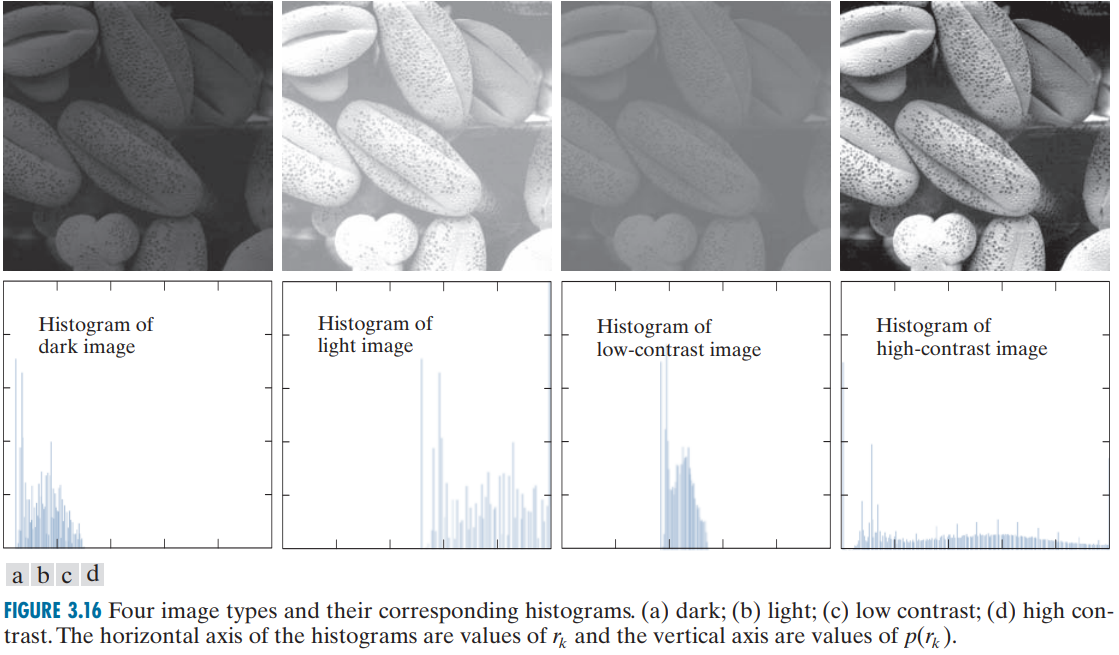

In [ ]:
img = cv2.imread(           ,0)

mostrar_histograma(img)

print("\n")
mostrar_imagen(img, "Imagen original")

In [ ]:
img_eq = cv2.equalizeHist(          )



mostrar_histograma(              ) # Muestra histograma
print("\n")
mostrar_imagen(img_eq, "Imagen original") # Mostrar imagen

## Filtros convolucionales

Los filtros convolucionales, a menudo denominados kernels o máscaras, son matrices pequeñas que se utilizan para modificar imágenes mediante una operación de convolución. Dependiendo de los valores en el kernel, diferentes operaciones, desde el desenfoque hasta la detección de bordes, pueden ser realizadas.



1. Filtro de promedio (desenfoque)

\begin{bmatrix}
    1 & 1 & 1 \\
    1 & 1 & 1 \\
    1 & 1 & 1 \\
\end{bmatrix}

Este filtro se utiliza para desenfocar una imagen al promediar los valores de los píxeles vecinos.


    

In [ ]:
img = cv2.imread(            ,0)

mostrar_imagen(img, "Imagen Original")

# Definimos un kernel (filtro) 3x3. Este filtro es básicamente un promedio 3x3.
kernel = np.array((
	[1, 1, 1],
	[1, 1, 1],
	[1, 1, 1]), dtype="float32") /

# Aplicamos el filtro a la imagen usando la función filter2D de OpenCV.
# El -1 indica que la imagen de salida tendrá la misma profundidad que la imagen de entrada.


# Mostramos la imagen después de aplicar el filtro.
mostrar_imagen(outputFiltro, "Imagen filtrada")

2. Filtro Gaussiano

El filtro gaussiano es una herramienta fundamental en el procesamiento de imágenes y visión por computadora. Aquí te presento algunas de las aplicaciones y propósitos más comunes de este filtro:

**Reducción de Ruido:**

Una de las aplicaciones más directas del filtro gaussiano es la reducción del ruido en las imágenes. El ruido puede deberse a diversos factores, como errores en la captura de la imagen, transmisión, etc. El filtro gaussiano puede suavizar la imagen y eliminar este ruido sin afectar demasiado los bordes de la misma.

**Suavizado:**

Es útil para eliminar detalles pequeños o texturas no deseadas de una imagen, haciendo que la imagen sea más "limpia" o "suave".

**Preprocesamiento:**

En muchos algoritmos de visión por computadora, como la detección de bordes (por ejemplo, el detector de bordes Canny), es común aplicar un filtro gaussiano como paso de preprocesamiento para reducir el ruido y evitar detecciones falsas.

**Enfoque y Desenfoque:**

El filtro gaussiano puede utilizarse para crear efectos de desenfoque. A la inversa, al restar una imagen filtrada gaussiana de la original, podemos realzar o enfocar ciertas características de la imagen.

In [ ]:
# Leer la imagen
img = cv2.imread(                  , 0)

# Aplicar filtro gaussiano
# El segundo argumento es el tamaño del kernel. Debe ser impar y puede ser diferente en x e y.
# El tercer argumento es la desviación estándar en la dirección X.
# Si se establece en 0, se calcula a partir del tamaño del kernel.
img_gaussiana =

mostrar_imagen(img, "Imagen Original")
mostrar_imagen(img_gaussiana, "Imagen con Filtro Gaussiano")

Filtro de realce

Este filtro aumenta o realza los detalles en una imagen

In [ ]:
# Leer la imagen
img = cv2.imread(             ,0)

# Kernel para el realce
kernel_sharpen = np.array((
    [-1, -1, -1],
    [-1,  9, -1],
    [-1, -1, -1]), dtype="float32")

# Aplicar el kernel usando filter2D
img_enhanced = cv2.filter2D(img, -1,         )

mostrar_imagen(img, "Imagen Original")
mostrar_imagen(img_enhanced, "Imagen con Realce")

Filtro Sobel (Detección de bordes)

Horizontal:
    
\begin{bmatrix}
    -1 & 0 & 1 \\
    -2 & 0 & 2 \\
    -1 & 0 & 1 \\
\end{bmatrix}
    
Vertical:
    
\begin{bmatrix}
    -1 & -2 & -1 \\
    0 & 0 & 0 \\
    1 & 2 & 1 \\
\end{bmatrix}
Estos filtros detectan bordes horizontales y verticales, respectivamente.

In [ ]:
img = cv2.imread(         , 0)
img = cv2.GaussianBlur(img, (5,5), 0)
# Kernel Sobel para detectar bordes horizontales
sobel_horizontal = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=        )

# Kernel Sobel para detectar bordes verticales
sobel_vertical = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=        )

# Calcular la magnitud de los gradientes
magnitude = cv2.magnitude(sobel_horizontal, sobel_vertical)

mostrar_imagen(img, "Imagen Original")
mostrar_imagen(sobel_horizontal, "Bordes Horizontales")
mostrar_imagen(sobel_vertical, "Bordes Verticales")
mostrar_imagen(magnitude,"Magnitudes")


## Thresholding (Umbralización)



El "thresholding" o umbralización es una técnica de procesamiento de imágenes que se utiliza para binarizar una imagen. Esta técnica convierte una imagen en una compuesta únicamente por dos valores de píxeles, generalmente representados como blanco y negro.

La idea básica detrás de la umbralización es establecer un valor de umbral. Luego:

- Todos los píxeles en la imagen con un valor **por encima** de ese umbral se configuran a un valor (por lo general blanco).
- Todos los píxeles con un valor **por debajo** de ese umbral se configuran a otro valor (generalmente negro).

La umbralización se describe mediante la siguiente fórmula:

\[ f(x, y) =
\begin{cases}
\text{maxValue} & \text{si } I(x, y) > \text{umbral} \\
\text{minValue} & \text{si } I(x, y) \leq \text{umbral}
\end{cases}
\]

Donde:
- \( f(x, y) \) es el valor del píxel en la imagen de salida en la posición (x, y).
- \( I(x, y) \) es el valor del píxel en la imagen de entrada en la posición (x, y).
- "maxValue" y "minValue" son, respectivamente, los valores máximos y mínimos que puede tener un píxel en la imagen. En imágenes binarias, "maxValue" suele ser 255 (blanco) y "minValue" es 0 (negro).

### Técnicas de Umbralización

1. **Umbralización Simple**: Se elige un valor de umbral fijo.
2. **Umbralización Adaptativa**: El valor de umbral se determina de manera adaptativa para diferentes regiones de la imagen. Esto es útil cuando hay variaciones de iluminación en la imagen.
3. **Umbralización de Otsu**: Esta técnica elige automáticamente el valor de umbral que maximiza la varianza entre dos clases de píxeles (fondo y primer plano).

### Aplicaciones de la Umbralización

La umbralización es útil en tareas como:
- **Segmentación de Imágenes**: Donde se desea separar objetos de interés del fondo.
- **Preprocesamiento**: Para mejorar la detección de bordes o contornos.
- **Extracción de Características**: De la imagen.

> **Nota**: OpenCV, una popular biblioteca de procesamiento de imágenes, proporciona funciones como `cv2.threshold` y `cv2.adaptiveThreshold` para realizar operaciones de umbralización en imágenes.


In [ ]:
img = cv2.imread(              , 0) # Imagen en escala de grises


blurred = cv2.GaussianBlur(img,           , 0)

mostrar_imagen(blurred)

mostrar_histograma(blurred)




In [ ]:
# @title  { run: "auto" }
# Aplicar un umbral a la imagen
umbral = 85 # @param {type:"slider", min:0, max:255, step:1}

(T, thresh) = cv2.threshold(blurred,         , 255, cv2.THRESH_BINARY)

mostrar_imagen(thresh,"Imagen segmentada")

In [ ]:
# Aplica la técnica de umbralización de Otsu a la imagen 'blurred'.
# La umbralización de Otsu determina automáticamente el valor de umbral óptimo
# basándose en el histograma de la imagen y la varianza intra-clase.
# El '0' como segundo argumento indica que el valor de umbral será determinado automáticamente por el método de Otsu.
# 'cv2.THRESH_BINARY_INV' indica que los píxeles por encima del umbral serán configurados a 0 (negro)
# y los que estén por debajo del umbral serán configurados a 255 (blanco), invirtiendo el comportamiento típico
# de la umbralización binaria.
# El resultado es una imagen binaria invertida.

(T, otsuThresh) = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

mostrar_imagen(otsuThresh, "OTSU")

In [ ]:
"""
 Aplica la técnica de umbralización adaptativa a la imagen 'img'.
 En lugar de un valor de umbral global para toda la imagen,
 la umbralización adaptativa determina el valor de umbral para
 pequeñas regiones de la imagen. Esto puede ser útil en situaciones
 donde la iluminación varía en diferentes partes de la imagen.

 'cv2.ADAPTIVE_THRESH_MEAN_C' indica que el valor de umbral para
 una región específica se calcula como la media de los valores
 de píxel en la vecindad, menos la constante C (en este caso 10).

 'cv2.THRESH_BINARY_INV' indica que se debe invertir el resultado
 de la umbralización, es decir, los píxeles por encima del umbral
 serán configurados a 0 y los que estén por debajo del umbral serán
 configurados a 255, invirtiendo el comportamiento típico de la
 umbralización binaria.

 '21' especifica el tamaño del bloque para calcular el valor de
 umbral (es decir, una ventana de 21x21 píxeles). Debe ser un número
 impar para asegurar que haya un píxel central.

 '10' es el valor de la constante C que se resta de la media o mediana
 calculada, permitiendo ajustar el umbral adaptativo.
"""
meanAdaptiveThresh =                  (img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 5)
mostrar_imagen(meanAdaptiveThresh, "Adaptive")

In [ ]:
gaussianAdaptiveThresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 5)
mostrar_imagen(gaussianAdaptiveThresh, "Adaptive")

## Operadores morfologicos

Las operaciones morfológicas son técnicas fundamentales en el procesamiento de imágenes binarias (y a veces también en imágenes en escala de grises). Se basan en la modificación de formas en una imagen mediante la aplicación de un elemento estructurante. Los principales tipos de operaciones morfológicas son:

- Erosión
- Dilatación
- Apertura
- Cierre

Erosión

La erosión "erosiona" o reduce las regiones brillantes (blancas) de la imagen. Es útil para eliminar pequeñas manchas o estructuras no deseadas.

In [ ]:
kernel = np.ones((3,3), np.uint8)
eroded_image =                   (gaussianAdaptiveThresh, kernel, iterations=1)
mostrar_imagen(eroded_image, "Image")

Dilatación

La dilatación "expande" o aumenta las regiones brillantes (blancas) de la imagen. Es útil para conectar objetos o estructuras cercanas.

In [ ]:
kernel = np.ones((3,3), np.uint8)
dilated_image =                   (gaussianAdaptiveThresh, kernel, iterations=1)
mostrar_imagen(dilated_image, "Image")

Apertura

La apertura es una erosión seguida de una dilatación. Es útil para eliminar el ruido o pequeñas manchas de una imagen.

In [ ]:
kernel = np.ones((3,3), np.uint8)
opened_image = cv2.morphologyEx(gaussianAdaptiveThresh, cv2.MORPH_OPEN, kernel)
mostrar_imagen(opened_image, "Image")

Cierre

El cierre es una dilatación seguida de una erosión. Es útil para cerrar pequeños agujeros o huecos en objetos.

In [ ]:
kernel = np.ones((3,3), np.uint8)
closed_image = cv2.morphologyEx(gaussianAdaptiveThresh, cv2.MORPH_CLOSE, kernel)
mostrar_imagen(closed_image,"Image")


Momentos de Hu


Los momentos de Hu son un conjunto de 7 momentos invariantes (o números) que son invariantes a las transformaciones de traslación, escala y rotación. Estos momentos son ampliamente utilizados en el reconocimiento de patrones y análisis de formas en imágenes, ya que proporcionan una descripción numérica de la forma de un objeto, que sigue siendo la misma independientemente de su orientación, tamaño o posición.

Dado que son invariantes a estas transformaciones, se utilizan a menudo para reconocer y clasificar formas y objetos en imágenes, incluso si están rotados, escalados o trasladados.

https://es.wikipedia.org/wiki/Momentos_de_imagen


In [ ]:

import numpy as np

# Suponiendo que tienes una imagen binarizada 'binary_image'
contours, _ = cv2.findContours(otsuThresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

hu_moments_list = []

for contour in contours:
    # Calcula los momentos normales del contorno
    moments = cv2.moments(contour)

    # Calcula los momentos de Hu a partir de los momentos normales
    hu_moments = cv2.HuMoments(moments)

    # Opcional: si quieres transformar los momentos para mejorar la comparación
    log_hu_moments = [-np.sign(m)*np.log10(np.abs(m)) for m in hu_moments]

    hu_moments_list.append(log_hu_moments)

# Ahora, 'hu_moments_list' contendrá una lista de los 7 momentos de Hu para cada contorno
print(hu_moments_list)

[[array([0.16276157]), array([0.35211184]), array([3.06147604]), array([4.0265492]), array([-7.57056182]), array([-4.20260512]), array([15.96242491])], [array([0.43339885]), array([0.99381137]), array([3.35952418]), array([3.47266641]), array([6.89429846]), array([3.97241421]), array([7.68827405])], [array([0.4523906]), array([1.02880741]), array([2.37187563]), array([2.67549822]), array([5.20106229]), array([3.20006754]), array([6.23175025])], [array([0.30122826]), array([0.65482171]), array([2.99927607]), array([3.75661203]), array([7.63463642]), array([-5.04117408]), array([-7.1574259])], [array([0.19500509]), array([0.42800634]), array([1.92923895]), array([2.14943292]), array([4.19174498]), array([2.41654859]), array([5.12180633])], [array([0.36445779]), array([0.80720512]), array([1.99283321]), array([2.17327897]), array([4.25669686]), array([2.58534707]), array([5.64565939])], [array([0.41096535]), array([0.9080891]), array([3.30135405]), array([4.32898962]), array([-8.14431258]